# Árvore de Decisão

Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\rodri\GitHub\My_Projects\1 Aulas Data Science\Data Sets/breast-cancer-wisconsin-data.zip')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning & EDA

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
d={'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].map(d)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

In [15]:
features = df[['radius_mean', 'concave points_mean']]
targets = df['diagnosis']

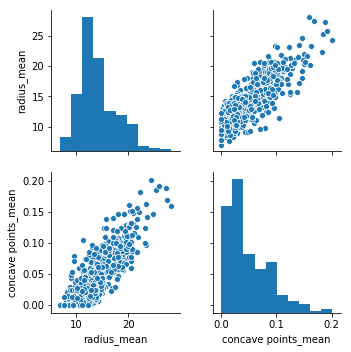

In [16]:
sns.pairplot(features);

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, stratify=targets,random_state=1)

## Model + Fit + Predict

In [31]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt'
dt = DecisionTreeClassifier(random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

pd.DataFrame({'modelo':y_pred,'real':y_test}).head(7)

,modelo,real
196,1,1
120,0,0
151,0,0
280,1,1
288,0,0
201,1,1
323,1,1


## Métricas

In [32]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f} %".format(acc*100))

Test set accuracy: 92.11 %


## Critério de Otimização: "Gini" ou "Entropia"

In [33]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini    = accuracy_score(y_test, y_pred_gini)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8947368421052632
Accuracy achieved by using the gini index:  0.9210526315789473


## Critério de Otimização: "Max_Depth"

In [34]:
lista_max_depth = [None,5,6,7,9,10]

In [36]:
for i in lista_max_depth:
    
    #modelo
    dt = DecisionTreeClassifier(random_state=1, max_depth=i)
    
    # Fit dt to the training set
    dt.fit(X_train, y_train)

    # Predict test set labels
    y_pred = dt.predict(X_test)
    
    # Predict test set labels
    y_pred = dt.predict(X_test)

    # Compute test set accuracy  
    acc = accuracy_score(y_test, y_pred)
    print("Test set accuracy: {:.4f} wiht max depth = {}".format(acc, i))

Test set accuracy: 0.9211 wiht max depth = None
Test set accuracy: 0.8947 wiht max depth = 5
Test set accuracy: 0.8860 wiht max depth = 6
Test set accuracy: 0.8947 wiht max depth = 7
Test set accuracy: 0.9123 wiht max depth = 9
Test set accuracy: 0.9211 wiht max depth = 10


## Variando mais de um atributo:

In [37]:
lista_max_depth = [None,5,9]
lista_criterio = ['gini', 'entropy']

for i in lista_max_depth:
    for j in lista_criterio:
    
        #modelo
        dt = DecisionTreeClassifier(random_state=42, max_depth=i, criterion=j)

        # Fit dt to the training set
        dt.fit(X_train, y_train)

        # Predict test set labels
        y_pred = dt.predict(X_test)

        # Predict test set labels
        y_pred = dt.predict(X_test)

        # Compute test set accuracy  
        acc = accuracy_score(y_test, y_pred)
        print("Test set accuracy: {:.4f} wiht max depth = {} and criterion = {}".format(acc, i, j))

Test set accuracy: 0.9035 wiht max depth = None and criterion = gini
Test set accuracy: 0.8947 wiht max depth = None and criterion = entropy
Test set accuracy: 0.8947 wiht max depth = 5 and criterion = gini
Test set accuracy: 0.9035 wiht max depth = 5 and criterion = entropy
Test set accuracy: 0.9211 wiht max depth = 9 and criterion = gini
Test set accuracy: 0.8947 wiht max depth = 9 and criterion = entropy


## Atributos da nossa Árvore

In [38]:
# Modelando a árvore usando as outras features

features = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
targets = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, stratify=targets,random_state=1)

In [39]:
for i in lista_max_depth:
    for j in lista_criterio:
    
        #modelo
        dt = DecisionTreeClassifier(random_state=42, max_depth=i, criterion=j)

        # Fit dt to the training set
        dt.fit(X_train, y_train)

        # Predict test set labels
        y_pred = dt.predict(X_test)

        # Predict test set labels
        y_pred = dt.predict(X_test)

        # Compute test set accuracy  
        acc = accuracy_score(y_test, y_pred)
        print("Test set accuracy: {:.4f} wiht max depth = {} and criterion = {}".format(acc, i, j))

Test set accuracy: 0.9211 wiht max depth = None and criterion = gini
Test set accuracy: 0.9386 wiht max depth = None and criterion = entropy
Test set accuracy: 0.9386 wiht max depth = 5 and criterion = gini
Test set accuracy: 0.9298 wiht max depth = 5 and criterion = entropy
Test set accuracy: 0.9211 wiht max depth = 9 and criterion = gini
Test set accuracy: 0.9386 wiht max depth = 9 and criterion = entropy


In [40]:
dt.feature_importances_

array([0.        , 0.03132283, 0.        , 0.        , 0.        ,
       0.        , 0.0231333 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01874339, 0.01496118,
       0.        , 0.        , 0.        , 0.        , 0.01119112,
       0.03430772, 0.07902651, 0.59374757, 0.        , 0.        ,
       0.        , 0.01324567, 0.18032071, 0.        , 0.        ])

In [41]:
pd.DataFrame(dt.feature_importances_, 
             index=features.columns, 
             columns=['Importância no modelo']
            
).sort_values('Importância no modelo', ascending=False).head(10)

,Importância no modelo
perimeter_worst,0.593748
concave points_worst,0.180321
texture_worst,0.079027
radius_worst,0.034308
texture_mean,0.031323
concavity_mean,0.023133
area_se,0.018743
smoothness_se,0.014961
concavity_worst,0.013246
fractal_dimension_se,0.011191


In [42]:
dt.max_depth

9

In [43]:
dt.n_features_

30

## Visualizando nossa árvore

    pip install graphviz

In [44]:
from sklearn.tree import export_graphviz
import pydot

In [45]:
export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names = features.columns,
                #class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [46]:
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

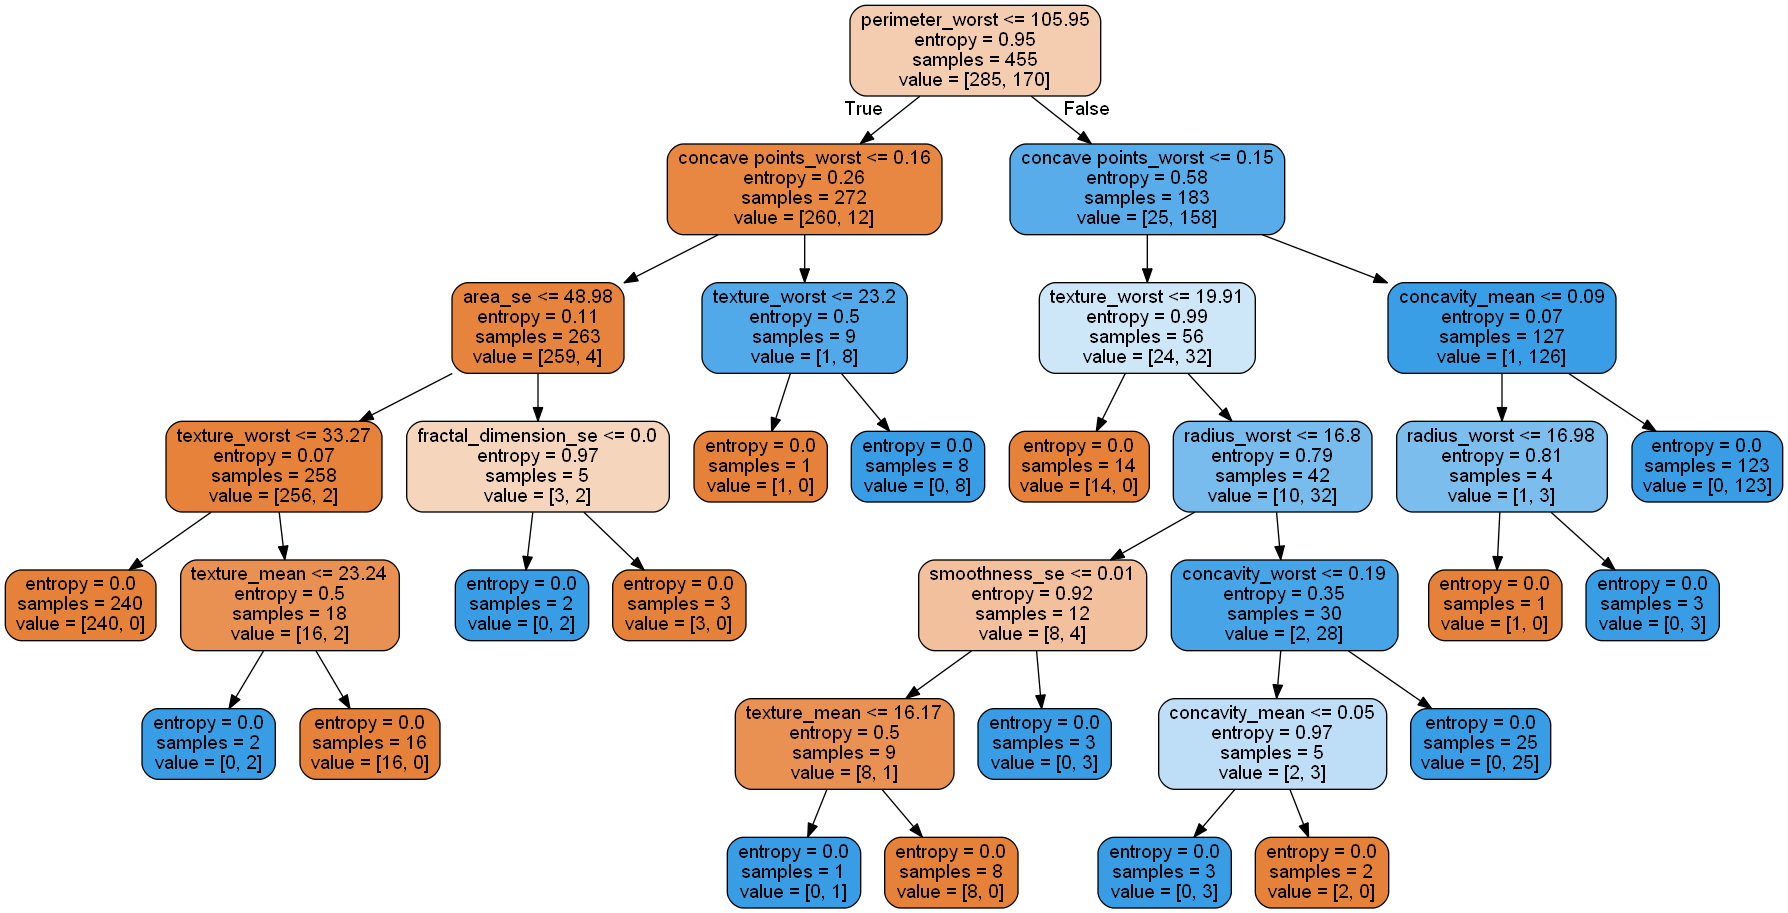

In [47]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [48]:
## Criando uma árvore mais simples de exemplo

features = df[['radius_mean', 'concave points_mean']]
targets = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, stratify=targets,random_state=1)

dt = DecisionTreeClassifier(random_state=42, max_depth=2, criterion='gini')

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(acc))

Test set accuracy: 0.9035


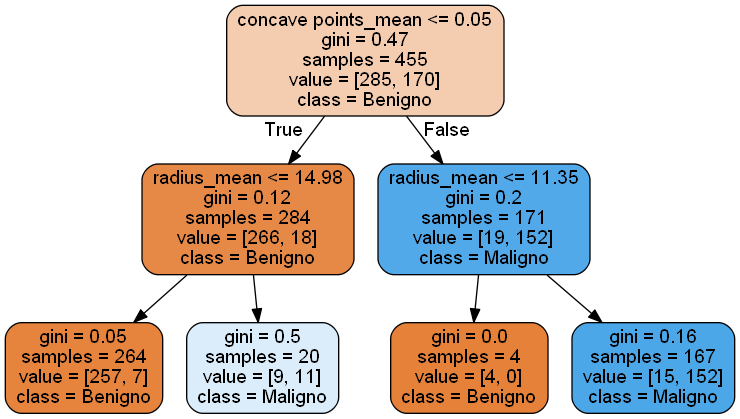

In [49]:
export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names = features.columns,
                class_names = ['Benigno', 'Maligno'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

Image(filename = 'tree.png')